In [1]:
%matplotlib widget
import obspy
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, aic_simple
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import coincidence_trigger
from obspy.signal.cross_correlation import correlation_detector
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_working
import matplotlib.ticker as ticker
from datetime import datetime
from datetime import timedelta

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
chan_z = 'GHZ'
chan_x = 'GH2'
chan_y = 'GH1'
#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]
statlist = [ 'A01' ,'A02' , 'A03' , 'A04']# , 'A05' , 'A06' , 'A07' , 'A08' , 'A09', 'A10' , 'A11', 'A13', 'A14', 'A19']#, 'A16', 'A17', 'A18', 'A19' ]
#statlist = [ 'B01' ,'B02' , 'B03' , 'B04' , 'B06' , 'B07' , 'B08' , 'B09','B10' , 'B11', 'B12', 'B13' , 'B19' , 'B20']#,'B14','B15','B16','B17','B18','B19', 'B20' ]

day = 15
hr = 15
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+hr*3600
end_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+(hr+1)*3600
stream_z = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan_z +".2020.0" +str(day))
stream_x = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan_x +".2020.0" +str(day))
stream_y = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan_y +".2020.0" +str(day))

In [4]:
for s in statlist[1:]:
    
    stream_z += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan_z + ".2020.0" + str(day))
    stream_x += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan_x + ".2020.0" + str(day))
    stream_y += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan_y + ".2020.0" + str(day))


In [5]:
data_z = stream_z.slice(starttime=start_time,endtime=end_time)
data_x = stream_x.slice(starttime=start_time,endtime=end_time) #look into trim()
data_y = stream_y.slice(starttime=start_time,endtime=end_time) #look into trim()

In [6]:
waveforms_z = [w.data for w in data_z]
times_stamp = [t.times('timestamp') for t in data_z]
waveforms_x = [w.data for w in data_x]
waveforms_y = [w.data for w in data_y]

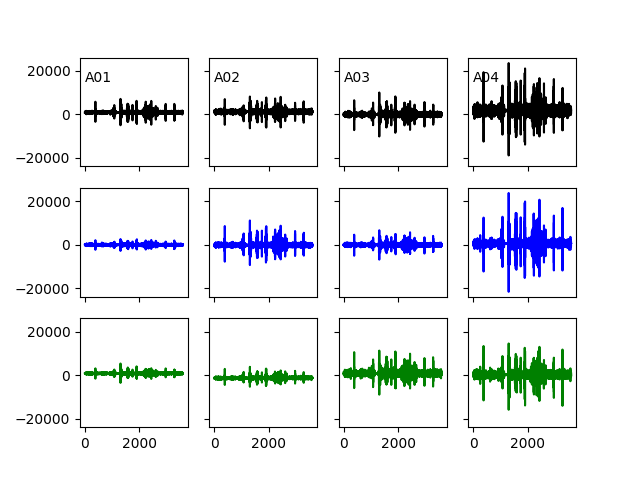

In [7]:
#axes_id = dict(np.array([['7F.A01..BHZ' ,'7F.A02..BHZ' , '7F.A03..BHZ' , '7F.A04..BHZ'],[0,1,2,3], ]).transpose())
axes_id = dict(np.array([['A01' ,'A02' , 'A03' , 'A04'],[0,1,2,3], ]).transpose())

fig1, ax1 = plt.subplots(3, len(data_z), sharex=True, sharey=True)

for i in np.arange(0, len(data_z), 1):
    # plot waveform
    ax1[0,i].plot(times_stamp[i]-times_stamp[0][0], waveforms_z[i], color='black')
    ax1[1,i].plot(times_stamp[i]-times_stamp[0][0], waveforms_x[i], color='blue')
    ax1[2,i].plot(times_stamp[i]-times_stamp[0][0], waveforms_y[i], color='green')
    
    # plot hydrophone name
    ax1[0,i].text(1, 15000, list(axes_id.keys())[i])